In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# create new df with all Age null rows removed

In [5]:
df_train.shape

(891, 12)

In [7]:
df = df_train.copy()

In [8]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis =1, inplace = True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df["Embarked"].fillna(df.Embarked.mode()[0], inplace =True)

In [13]:
df.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [14]:
Sex_dummies = pd.get_dummies(df.Sex, prefix = "Sex")

In [16]:
df_with_dummies1 = pd.concat([df,Sex_dummies],axis=1)

In [17]:
df_with_dummies1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [18]:
embarked_dummies = pd.get_dummies(df.Embarked, prefix = "Embarked")

In [19]:
df_with_dummies = pd.concat([df_with_dummies1,embarked_dummies],axis=1)

In [20]:
df_with_dummies.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [21]:
df_with_dummies.drop(["Sex","Embarked","Sex_female","Embarked_C"], axis = 1,inplace =True)

In [22]:
df_with_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
df_with_dummies.Age.isnull().sum()

177

In [30]:
df_with_dummies["Age"]=df_with_dummies["Age"].fillna(df_with_dummies["Age"].mean())

In [31]:
df_with_dummies.Age.isnull().sum()

0

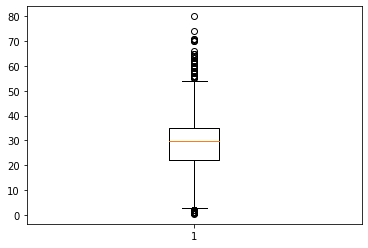

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df_with_dummies.Age)
plt.show()

In [34]:
df_with_dummies.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [36]:
print("upper_whisker =", 35+1.5*(35-22))

upper_whisker = 54.5


In [37]:
print("lower whisker", 22-1.5*(35-22))

lower whisker 2.5


In [38]:
df_new = df_with_dummies.copy()

In [40]:
df_new = df_new[df_new["Age"]<= 55]

In [43]:
df_new  =df_new[df_new["Age"]>= 2]

In [44]:
df_new.shape

(837, 9)

In [84]:
target = df_new.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
df_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [85]:
inputs = df_new.drop("Survived", axis =1)

In [86]:
inputs.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

In [87]:
model.fit(inputs,target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
df_test1 = pd.read_csv('test.csv')
df_test = df_test1.copy()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace =True)

In [55]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace =True)

In [59]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [60]:
df_test=df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis =1)

In [61]:
df_test_dummies = pd.get_dummies(df_test['Sex'], prefix ="Sex")

In [62]:
df_test_withdummies1 = pd.concat([df_test,df_test_dummies],axis =1)

In [63]:
df_test_dummies1 = pd.get_dummies(df_test["Embarked"], prefix = "Embarked")

In [64]:
df_test_withdummies = pd.concat([df_test_withdummies1,df_test_dummies1],axis =1)

In [65]:
df_test_withdummies.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,Q,0,1,0,1,0
1,3,female,47.0,1,0,7.0000,S,1,0,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,1,0,0,1
4,3,female,22.0,1,1,12.2875,S,1,0,0,0,1


In [66]:
df_test_withdummies.drop(["Sex","Embarked","Sex_female","Embarked_C"], axis =1, inplace= True)

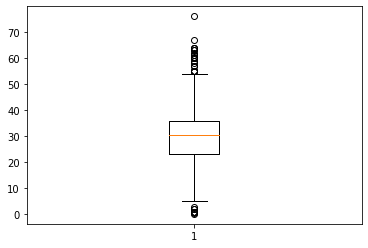

In [67]:
plt. boxplot(df_test_withdummies.Age)
plt.show()

In [68]:
df_test_withdummies.Age.describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [69]:
print("upper whisker =", 35.75+1.5*(35.75-23))

upper whisker = 54.875


In [70]:
print("lower whisker =", 23-1.5*(35.75-23))

lower whisker = 3.875


In [71]:
df1 = df_test_withdummies[df_test_withdummies["Age"] <= 55]

In [72]:
df1 = df1[df1["Age"] >= 3.5]

In [73]:
df1.shape

(388, 8)

In [74]:
df1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
5,3,14.0,0,0,9.2250,1,0,1


In [75]:
test_inputs = df_test_withdummies.iloc[:,0:]
test_inputs.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [88]:
pred = model.predict(test_inputs)

In [89]:
df_pred = df_test1.iloc[:,0:1]
df_pred.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [90]:
df_pred['Survived']= pred

In [91]:
df_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [92]:
df_pred.to_csv('Titanic_submission10.csv',index = False)

# Using SVM

In [156]:
from sklearn.svm import SVC

In [157]:
new_model = SVC()

In [158]:
new_model.fit(inputs, target)

SVC()

In [159]:
pred = new_model.predict(test_inputs)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [160]:
df_pred['Survived']= pred

In [161]:
df_pred.to_csv('Titanic_submission 5.csv',index = False)

# SVM gives poor result than Logistic Reg & Decision Tree(Logistic Reg is better than Decision tree)